# Prevendo Participantes do Enem 2016

### O objetivo deste desafio é prever quais alunos participaram do Enem 2016 apenas para treinamento. Foram utilizadas técnicas de transformação e limpeza nos dados adquiridos e avaliados algoritmos de classificação para saber quais poderiam ser utilizados para concluir a tarefa.

### Este desafio se encontra no programa AceleraDev DataScience da empresa Codenation e foi disponibilizado a todos os participantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Conhecendo os conjuntos de treino e teste

In [3]:
# Importando os dados
df_train = pd.read_csv('train.csv', sep=",", encoding="utf-8", header=0)
df_test = pd.read_csv('test.csv', sep=",", encoding="utf-8", header=0)

In [7]:
#verificando colunas
pd.set_option('max_columns',200)
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [8]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


In [10]:
#forma dos dados
df_train.shape, df_test.shape

((13730, 167), (4570, 43))

## Verificando dados do target

`A variável IN_TREINEIRO do dataset é o alvo da predição deste projeto, é necessario avaliar os tipos de dados existentes, a quantidade de observações presentes em cada classe e se existem ajustes necessários nos dados para que os modelos consigam predizer de forma correta as observações para os dados de teste.`

In [11]:
#verificando dados da coluna
df_train.IN_TREINEIRO.unique()

array([0, 1])

In [13]:
#verificando quantidade de observações em cada classe
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

Text(0.95, 891.5, '12.99 %')

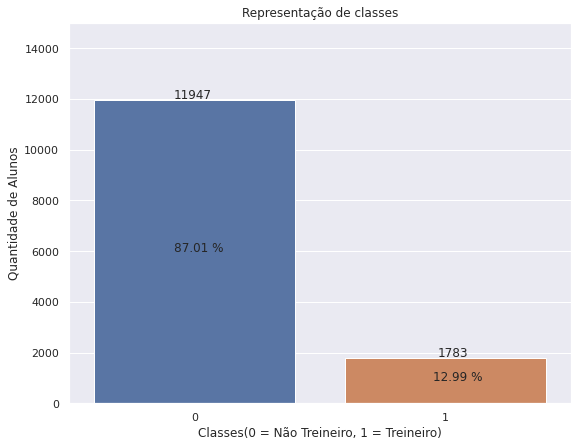

In [16]:
#Plotando representação das classes
nao_treineiro, treineiro = df_train['IN_TREINEIRO'].value_counts()[0], df_train['IN_TREINEIRO'].value_counts()[1]

fig = plt.figure(figsize=(9,7))

sns.set(style="darkgrid")
sns.countplot(df_train['IN_TREINEIRO'])

plt.title("Representação de classes")
plt.ylabel("Quantidade de Alunos")
plt.xlabel("Classes(0 = Não Treineiro, 1 = Treineiro)")
plt.ylim([0, 15000])

plt.annotate(f"{nao_treineiro}", (0 - 0.08, nao_treineiro + 50))
plt.annotate(f"{treineiro}", (1 - 0.03, treineiro + 50))
plt.annotate(f"{round(nao_treineiro / (nao_treineiro+treineiro) * 100, 2)} %", (0 - 0.08, nao_treineiro - (nao_treineiro/2)))
plt.annotate(f"{round(treineiro  / (nao_treineiro+treineiro) * 100, 2)} %", (1 - 0.05, treineiro - (treineiro/2)))

`Com base nas representações acima pode-se verificar que a classe dos candidatos treineiros possui menos observações que a classe dos não treineiros, este problema é frequente em bases que a avaliação seja de classificação. Os modelos de machine learning não trabalham bem com classes desbalanceadas, a aprendizagem se torna mais eficaz na classe que tem mais observações, gerando assim um possível 'disfarce' nas predições, ou seja, o modelo aprende mais as características da classe que tem mais exemplos e acaba errando mais na classe com menos exemplos. Para corrigir este problema antes de aplicar os dados aos modelos será usada a técnica de SMOTE para balanceamento das classes.`

## Verificando correlações das features

`Para selecionar as features necessárias ao modelo será utilizado o cálculo das correlações, mantendo como parâmetro a correlação com a coluna IN_TREINEIRO.`

In [18]:
#obtendo correlações das variávies
correlations = df_train.corr()

In [19]:
#separando features com 30% ou mais de correlação(positiva ou negativa) a NU_NOTA_MT
features_filter = correlations[(correlations['IN_TREINEIRO'] <= -0.3) | (correlations['IN_TREINEIRO'] >= 0.3) & (correlations['IN_TREINEIRO'] < 1.0)]['IN_TREINEIRO']
features_filter

TP_ST_CONCLUSAO    0.533983
Name: IN_TREINEIRO, dtype: float64

In [20]:
#separando features com 20% ou mais de correlação(positiva ou negativa) a NU_NOTA_MT
features_filter = correlations[(correlations['IN_TREINEIRO'] <= -0.2) | (correlations['IN_TREINEIRO'] >= 0.2) & (correlations['IN_TREINEIRO'] < 1.0)]['IN_TREINEIRO']
features_filter

NU_IDADE          -0.295091
TP_ST_CONCLUSAO    0.533983
TP_ANO_CONCLUIU   -0.257710
TP_ESCOLA         -0.244562
Name: IN_TREINEIRO, dtype: float64

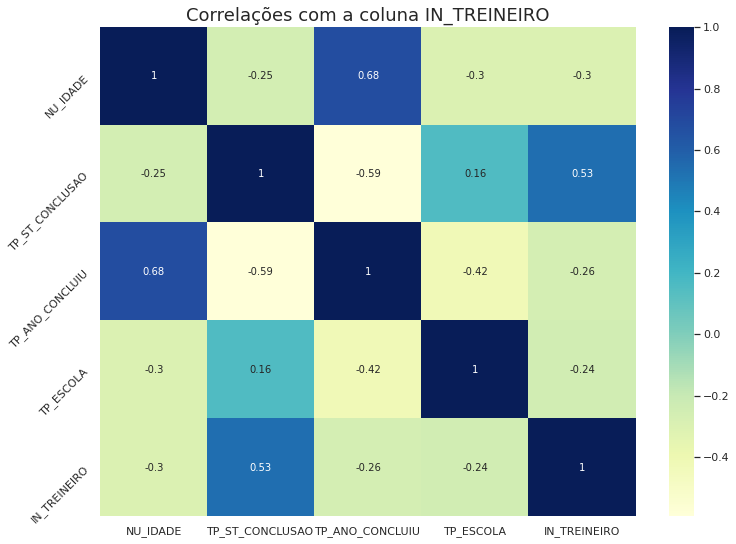

In [21]:
#Plotando gráfico de correlações
figure = plt.subplots(figsize=(12, 9))

plt.title("Correlações com a coluna IN_TREINEIRO", fontsize=18)

plot = sns.heatmap(df_train[features_filter.index.to_list() + ['IN_TREINEIRO']].corr(), 
                   annot=True, annot_kws={"size": 10}, cmap="YlGnBu")
plot = plot.set_yticklabels(plot.get_yticklabels(), rotation=45)

`Avaliando os percentuais de correlação será utilizado o valor de 20% para obter uma quantidade significativa de features, apesar de ser um valor baixo para a correlação permite selecionar algumas features interessantes, pois a partir de 30% de correlação só foi encontrada a variável TP_ST_CONCLUSAO o que pode não ser suficiente para uma boa performance do modelo.`

In [22]:
#lista de features selecionadas
features = features_filter.index.to_list()
features

['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']

In [23]:
#verificando a existencia das features no conjunto de teste
df_test.columns.isin(features).any()

True

In [25]:
#verificando valores vazios nas features
df_train[features+['IN_TREINEIRO']].isnull().sum()

NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ANO_CONCLUIU    0
TP_ESCOLA          0
IN_TREINEIRO       0
dtype: int64

## Preparando os dados

`A base de dados utilizada ainda está com classes desbalanceadas, com as features selecionadas falta agora aplicar a técnica SMOTE para realinhar os dados de forma que a classe com menos observações 'ganhe' novos registros para se igualar a classe com mais observações.`

In [27]:
#Criando dados de treino e teste
X_train = df_train[features]
y_train = df_train['IN_TREINEIRO']
X_test  = df_test[features]

In [28]:
smote = SMOTE(sampling_strategy="minority")

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Text(0.95, 5973.5, '50.0 %')

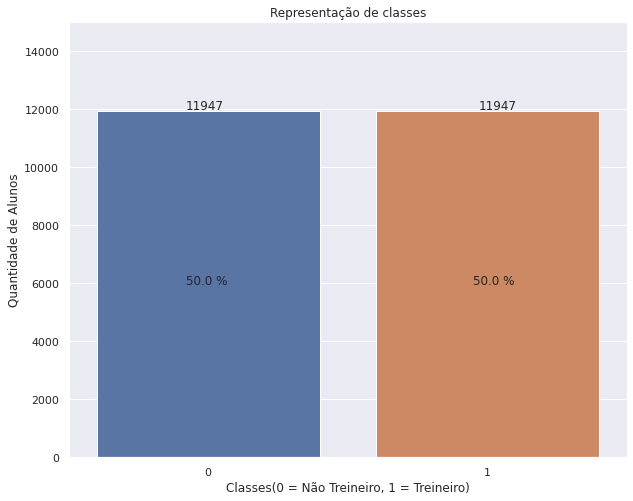

In [29]:
#Plotando representação das classes
nao_treineiro, treineiro = y_train_balanced.value_counts()[0], y_train_balanced.value_counts()[1]

fig = plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.countplot(y_train_balanced)

plt.title("Representação de classes")
plt.ylabel("Quantidade de Alunos")
plt.xlabel("Classes(0 = Não Treineiro, 1 = Treineiro)")
plt.ylim([0, 15000])

plt.annotate(f"{nao_treineiro}", (0 - 0.08, nao_treineiro + 50))
plt.annotate(f"{treineiro}", (1 - 0.03, treineiro + 50))
plt.annotate(f"{round(nao_treineiro / (nao_treineiro+treineiro) * 100, 2)} %", (0 - 0.08, nao_treineiro - (nao_treineiro/2)))
plt.annotate(f"{round(treineiro  / (nao_treineiro+treineiro) * 100, 2)} %", (1 - 0.05, treineiro - (treineiro/2)))

`Ao aplicar a técnica SMOTE foram criados dados sintéticos na classe minoritária(definido pelo parâmetro sampling_strategy="minority") igualando assim as observações para que os modelos possam melhor entender as características que compõem as duas classes.`

## Avaliação dos modelos

`Nos problemas de classificação é bastante comum a utilização de algoritmos de avaliação como os listados abaixo:` </br>
- `SGDClassifier`<br>
- `KNeighborsClassifier`</br>
- `DecisionTreeClassifier`</br>
- `GradientBoostClassifier`</br>
- `RandomForestClassifier`</br>
- `LogisticRegression` </br>
- `SVC`

`Para a otimização de parâmetros dos modelos será utilizado o GridSearchCv, esta classe permite gerar diversas combinações de parâmetros para encontrar a melhor implementação para o modelo.`

In [30]:
def grid_testing(pandas, pipeline, params, metrics, cv, X_train, y_train, refit='accuracy', verbose=0):
    """
    Avaliar a combinação de parâmetros em algoritmos de machile learn.\n
    
    Parameters\n
    ------------\n
    pandas - Implementação da biblioteca Pandas.\n
    pipeline - Lista contendo os pipelines aplicados ao conjunto de treino.\n
    metrics - Lista de métricas de avaliação dos modelos.\n
    params - Lista de parâmetros utilizados na validação.\n
    cv - Indicador da validação cruzada.\n
    refit - Métrica utilizada para escolha do melhor modelo.\n
    X_train - Conjunto de dados de treinamento.\n
    y_train - Classes de treinamento.\n
    verbose - Imprime avaliação de cada modelo.\n
    
    Return\n
    ------------\n
    Lista de modelos
    """
    models = {}
    for name, pipeline in pipelines:
        newparams = {chave:valor for chave,valor in params.items() if name in chave[:chave.find('__')]}
        
        grid = GridSearchCV(pipeline, param_grid=newparams, scoring=metrics, cv=cv, 
                            refit=refit, verbose=verbose, return_train_score=False)
        grid.fit(X_train, y_train)
        
        print(f'\nPipeline: {name}')
        print(f'Estimador: {grid.best_estimator_}')
        print(f'Score {refit}: {grid.best_score_}')
        print(f'Parâmetros: {grid.best_params_}')
        
        metrics_filter = {('mean_test_'+valor):valor for valor in metrics}
        metrics_filter['mean_fit_time'] = 'fit_time'        
        metrics_filter['params'] = 'params'
        
        results = pandas.DataFrame(grid.cv_results_)[list(metrics_filter.keys())].rename(columns=metrics_filter).sort_values(refit, ascending=True)
        models[name]=[grid,results]
    return models

In [31]:
#Criando os pipelines para aplicação dos dados
pipelines = []
pipelines.append(('SGD', Pipeline([('Scaler', StandardScaler()),('SGD',SGDClassifier())])))
pipelines.append(('KNC', Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier())])))
pipelines.append(('DTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
pipelines.append(('RFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
pipelines.append(('LRC', Pipeline([('Scaler', StandardScaler()),('LRC', LogisticRegression())])))
pipelines.append(('SVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))

In [32]:
#métricas de avaliação dos modelos
metricas = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [33]:
#Definindo os folds dos dados de treino/teste
kfold = KFold(n_splits=5, random_state=21, shuffle=True)

In [34]:
#definindo os parâmetros que seram testados em cada modelo
params = {'SGD__fit_intercept': [True, False], 
          'SGD__n_jobs': [1,2,3],
          'KNC__n_jobs': [1,2,3], 
          'KNC__n_neighbors': [5,6,7],
          'DTC__criterion': ['gini', 'entropy'], 
          'DTC__max_features': ['auto', 'sqrt'],
          'GBC__criterion': ['friedman_mse', 'mse'],
          'GBC__max_features': ['auto', 'sqrt'],
          'GBC__n_estimators': [10,20],
          'RFC__criterion': ['gini', 'entropy'],
          'RFC__max_features': ['auto', 'sqrt'],
          'RFC__n_estimators': [10,20],
          'RFC__n_jobs': [1,2,3],
          'LRC__fit_intercept': [True, False],
          'LRC__n_jobs': [1,2,3],
          'SVC__gamma': ['scale', 'auto'],
          'SVC__kernel': ['linear', 'poly', 'rbf'],
          'SVC__probability': [True, False]
         }

In [35]:
#executando a verificação
models = grid_testing(pd, pipelines, params, metricas, kfold, X_train_balanced, y_train_balanced, metricas[0])


Pipeline: SGD
Estimador: Pipeline(steps=[('Scaler', StandardScaler()), ('SGD', SGDClassifier(n_jobs=2))])
Score accuracy: 0.989788238290673
Parâmetros: {'SGD__fit_intercept': True, 'SGD__n_jobs': 2}

Pipeline: KNC
Estimador: Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNC', KNeighborsClassifier(n_jobs=1))])
Score accuracy: 0.9908764108637351
Parâmetros: {'KNC__n_jobs': 1, 'KNC__n_neighbors': 5}

Pipeline: DTC
Estimador: Pipeline(steps=[('Scaler', StandardScaler()),
                ('DTC', DecisionTreeClassifier(max_features='auto'))])
Score accuracy: 0.9913786079761016
Parâmetros: {'DTC__criterion': 'gini', 'DTC__max_features': 'auto'}

Pipeline: GBC
Estimador: Pipeline(steps=[('Scaler', StandardScaler()),
                ('GBC',
                 GradientBoostingClassifier(max_features='sqrt',
                                            n_estimators=20))])
Score accuracy: 0.9913786079761016
Parâmetros: {'GBC__criterion': 'friedman_mse', 'GBC__max_features': 'sqrt',

`Após executar a verificação dos modelos escolhidos é possível avaliar que, baseado na métrica acurácia(medida de acertos do modelo) escolhida no refit, 4 algoritmos obtiveram o mesmo resultado: o GradientBoostingClassifier, o DecisionTreeClassifier, o RandomForestClassifier e o SVC.`

`Para uma escolha mais equilibrada do modelo que será utilizado na predição é necessário avaliar as demais métricas passadas ao método grid_testing, para isso pode-se usar o atributo cv_results do objeto retornado pelo GridSearchCv como abaixo.`

In [36]:
#Visualizando as métricas de cada modelo
pd.set_option('max_colwidth',200)
print('\nModelo: DecisionTreeClassifier')
models['DTC'][1]


Modelo: DecisionTreeClassifier


,accuracy,f1,precision,recall,roc_auc,fit_time,params
0,0.991379,0.991449,0.983043,1.0,0.999829,0.025477,"{'DTC__criterion': 'gini', 'DTC__max_features': 'auto'}"
1,0.991379,0.991449,0.983043,1.0,0.999829,0.013348,"{'DTC__criterion': 'gini', 'DTC__max_features': 'sqrt'}"
2,0.991379,0.991449,0.983043,1.0,0.999829,0.014277,"{'DTC__criterion': 'entropy', 'DTC__max_features': 'auto'}"
3,0.991379,0.991449,0.983043,1.0,0.999829,0.013788,"{'DTC__criterion': 'entropy', 'DTC__max_features': 'sqrt'}"


In [37]:
#Visualizando as métricas de cada modelo
pd.set_option('max_colwidth',200)
print('\nModelo: GradientBoostingClassifier')
models['GBC'][1]


Modelo: GradientBoostingClassifier


,accuracy,f1,precision,recall,roc_auc,fit_time,params
6,0.990039,0.990042,0.989001,0.991270,0.999817,0.087800,"{'GBC__criterion': 'mse', 'GBC__max_features': 'sqrt', 'GBC__n_estimators': 10}"
2,0.990123,0.990084,0.992530,0.987806,0.999814,0.086354,"{'GBC__criterion': 'friedman_mse', 'GBC__max_features': 'sqrt', 'GBC__n_estimators': 10}"
0,0.990625,0.990711,0.981593,1.000000,0.999814,0.105170,"{'GBC__criterion': 'friedman_mse', 'GBC__max_features': 'auto', 'GBC__n_estimators': 10}"
4,0.990625,0.990711,0.981593,1.000000,0.999814,0.097956,"{'GBC__criterion': 'mse', 'GBC__max_features': 'auto', 'GBC__n_estimators': 10}"
1,0.990667,0.990753,0.981675,1.000000,0.999814,0.309313,"{'GBC__criterion': 'friedman_mse', 'GBC__max_features': 'auto', 'GBC__n_estimators': 20}"
5,0.990667,0.990753,0.981675,1.000000,0.999814,0.186721,"{'GBC__criterion': 'mse', 'GBC__max_features': 'auto', 'GBC__n_estimators': 20}"
3,0.991379,0.991449,0.983043,1.000000,0.999829,0.221507,"{'GBC__criterion': 'friedman_mse', 'GBC__max_features': 'sqrt', 'GBC__n_estimators': 20}"
7,0.991379,0.991449,0.983043,1.000000,0.999829,0.175613,"{'GBC__criterion': 'mse', 'GBC__max_features': 'sqrt', 'GBC__n_estimators': 20}"


In [38]:
#Visualizando as métricas de cada modelo
pd.set_option('max_colwidth',200)
print('\nModelo: RandomForestClassifier')
models['RFC'][1]


Modelo: RandomForestClassifier


,accuracy,f1,precision,recall,roc_auc,fit_time,params
0,0.991379,0.991449,0.983043,1.0,0.999829,0.076494,"{'RFC__criterion': 'gini', 'RFC__max_features': 'auto', 'RFC__n_estimators': 10, 'RFC__n_jobs': 1}"
21,0.991379,0.991449,0.983043,1.0,0.999829,0.141052,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'sqrt', 'RFC__n_estimators': 20, 'RFC__n_jobs': 1}"
20,0.991379,0.991449,0.983043,1.0,0.999829,0.465877,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'sqrt', 'RFC__n_estimators': 10, 'RFC__n_jobs': 3}"
19,0.991379,0.991449,0.983043,1.0,0.999829,0.182753,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'sqrt', 'RFC__n_estimators': 10, 'RFC__n_jobs': 2}"
18,0.991379,0.991449,0.983043,1.0,0.999829,0.084722,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'sqrt', 'RFC__n_estimators': 10, 'RFC__n_jobs': 1}"
17,0.991379,0.991449,0.983043,1.0,0.999829,0.777363,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'auto', 'RFC__n_estimators': 20, 'RFC__n_jobs': 3}"
16,0.991379,0.991449,0.983043,1.0,0.999829,0.290519,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'auto', 'RFC__n_estimators': 20, 'RFC__n_jobs': 2}"
15,0.991379,0.991449,0.983043,1.0,0.999829,0.177094,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'auto', 'RFC__n_estimators': 20, 'RFC__n_jobs': 1}"
14,0.991379,0.991449,0.983043,1.0,0.999829,0.325314,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'auto', 'RFC__n_estimators': 10, 'RFC__n_jobs': 3}"
13,0.991379,0.991449,0.983043,1.0,0.999829,0.198308,"{'RFC__criterion': 'entropy', 'RFC__max_features': 'auto', 'RFC__n_estimators': 10, 'RFC__n_jobs': 2}"


In [39]:
#Visualizando as métricas de cada modelo
pd.set_option('max_colwidth',200)
print('\nModelo: SVC')
models['SVC'][1]


Modelo: SVC


,accuracy,f1,precision,recall,roc_auc,fit_time,params
2,0.986901,0.987065,0.974464,1.0,0.998886,2.562239,"{'SVC__gamma': 'scale', 'SVC__kernel': 'poly', 'SVC__probability': True}"
3,0.986901,0.987065,0.974464,1.0,0.998886,0.464834,"{'SVC__gamma': 'scale', 'SVC__kernel': 'poly', 'SVC__probability': False}"
8,0.986901,0.987065,0.974464,1.0,0.998886,2.481369,"{'SVC__gamma': 'auto', 'SVC__kernel': 'poly', 'SVC__probability': True}"
9,0.986901,0.987065,0.974464,1.0,0.998886,0.449441,"{'SVC__gamma': 'auto', 'SVC__kernel': 'poly', 'SVC__probability': False}"
0,0.990500,0.990585,0.981348,1.0,0.998878,1.917091,"{'SVC__gamma': 'scale', 'SVC__kernel': 'linear', 'SVC__probability': True}"
1,0.990500,0.990585,0.981348,1.0,0.998878,0.285110,"{'SVC__gamma': 'scale', 'SVC__kernel': 'linear', 'SVC__probability': False}"
6,0.990500,0.990585,0.981348,1.0,0.998878,1.779459,"{'SVC__gamma': 'auto', 'SVC__kernel': 'linear', 'SVC__probability': True}"
7,0.990500,0.990585,0.981348,1.0,0.998878,0.277748,"{'SVC__gamma': 'auto', 'SVC__kernel': 'linear', 'SVC__probability': False}"
4,0.991379,0.991449,0.983043,1.0,0.999829,3.491039,"{'SVC__gamma': 'scale', 'SVC__kernel': 'rbf', 'SVC__probability': True}"
5,0.991379,0.991449,0.983043,1.0,0.999829,0.546535,"{'SVC__gamma': 'scale', 'SVC__kernel': 'rbf', 'SVC__probability': False}"


## Implementando o modelo selecionado

`Baseado na análise das métricas retornadas pelo atributo cv_results para os modelos que tiveram melhor acurácia, na implementação da resposta será utilizado o algoritmo DecisionTreeClassifier, pois apesar de quase todas as métricas serem iguais aos outros modelos, na melhor sua melhor performance, o tempo de treinamento foi menor para alcançar os mesmos resultados dos outros algoritmos.`

In [40]:
#Gerando DataFrame de Resposta
prediction = pd.DataFrame()
prediction['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [42]:
#Visualizando a melhor configuração
models['DTC'][0].best_estimator_, models['DTC'][0].best_params_

(Pipeline(steps=[('Scaler', StandardScaler()),
                 ('DTC', DecisionTreeClassifier(max_features='auto'))]),
 {'DTC__criterion': 'gini', 'DTC__max_features': 'auto'})

In [43]:
#Aplicando conjunto de teste
dtc_predict = models['DTC'][0].predict(X_test)

In [44]:
#visualizando retorno
dtc_predict, dtc_predict.shape

(array([0, 0, 1, ..., 0, 0, 0]), (4570,))

In [45]:
#Salvando no DataFrame de resposta
prediction['IN_TREINEIRO'] = dtc_predict

In [46]:
#gerando arquivo de resposta
prediction.to_csv('answer.csv', index=False, header=True)

## Conclusão

`O objetivo deste desafio era prever quais alunos participaram do enem 2016 apenas para treinamento. Utilizando algoritmos de machine learning para classificação e técnicas de limpeza e preparação dos dados foi possível identificar o conjunto de resposta com um acerto de 98.73%.`

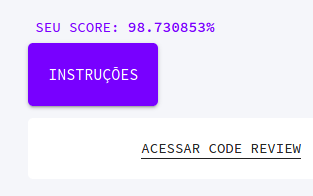

In [47]:
#Resultado
Image('resultado.png')